# 数据集和数据加载器

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls
!pwd
%cd drive/My Drive/pytorch/

drive  sample_data
/content
/content/drive/My Drive/pytorch


### 加载数据集
+ [^root] 是存储训练、测试数据的路径
+ [^train] 指定训练或测试数据集
+ [^download=True] 如果数据不可用，则从 Internet 下载数据root。
+ [^transform]和[^target_transform]指定特征和标签转换

In [3]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

### 迭代和可视化数据集
我们可以索引Datasets手动喜欢的列表：training_data[index]。我们matplotlib用来可视化训练数据中的一些样本

30916
6228
18949
38543
41575
42709
33327
33768
24037


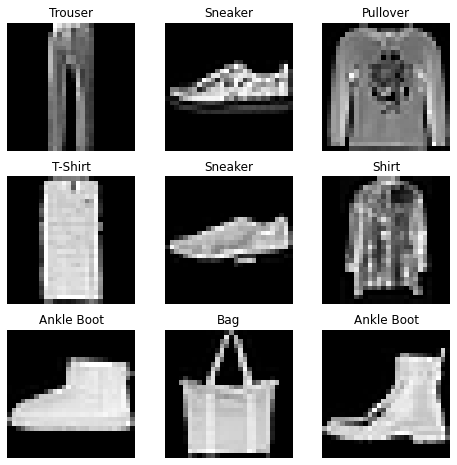

In [7]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    # 根据train_data的长度随机化一个数
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    # training_data 返回一个字典 包含data和label
    img, label = training_data[sample_idx]
    # 三个整数（nrows、ncols、index）。子图将在具有nrows行和ncols列的网格上占据 索引位置。 索引从左上角的 1 开始，向右增加
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### 创建自定义文件夹
自定义 Dataset 类必须实现三个函数：__init__、__len__和__getitem__。

In [8]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    # 初始化参数
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
    # 返回标签长度
    def __len__(self):
        return len(self.img_labels)
    # 获取地址（相对来说）  能根据标号找到该图片在数据集中的位置
    # image_path 图片的路径
    # image 读取图片
    # label 读取标签
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        # 图片转化
        if self.transform:
            image = self.transform(image)
        # 标签转化
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

###  准备数据以使用 DataLoaders 进行训练

该Dataset检索我们的数据的功能，并在同一时间标签一个样本。在训练模型时，我们通常希望以“小批量”形式传递样本，在每个时期重新洗牌数据以减少模型过度拟合，并使用 Python  multiprocessing来加速数据检索。

DataLoader 是一个迭代器，它在一个简单的 API 中为我们抽象了这种复杂性。

In [9]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


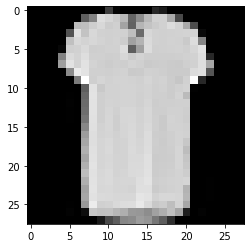

Label: 6


In [12]:
# Display image and label.

# next() 返回迭代器的下一个项目。
# next() 函数要和生成迭代器的 iter() 函数一起使用。
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")